In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('../dataset/iris.data',header=None)

In [3]:
#Extracting 100 rows for model training
#1st and 3rd feature taken into consideration
#Select setosa and versi color
y=df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa',-1,1)
#extract sepal length and petal length
X=df.iloc[0:100,[0,2]].values

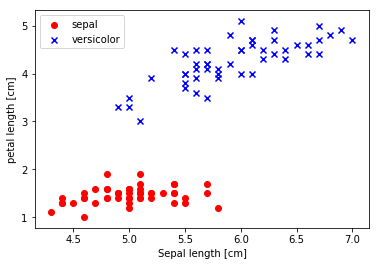

In [17]:
#plot data
plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='sepal')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [31]:
def net_input(X,w_):# Dot product of X.w with X0=1
    return np.dot(X,w_[1:])+w_[0];

In [32]:
def predict(X,w_):##Output greater than 0, produces 1, else -1
    return np.where(net_input(X,w_)>=0.0,1,-1)

In [44]:
def fit(X,y,n_iter,eta=0.01,random_state=1):
    #rgen to generate random intial value for weights
    #Here, size of X[100,2], so weight w_ has 3 value, w0,w1,w2( size of X + 1 )
    rgen=np.random.RandomState(random_state)
    w_=rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])
    #print(rgen)
    errors_=[]
    for _ in range(n_iter):
        errors=0
        for xi,target in zip(X,y):
            #Zip is to incremenet X and y array both, simultaneosely
            update=eta*(target-predict(xi,w_))
            w_[1:]+=update*xi
            w_[0]+=update;
            errors+=int(update!=0.0)
        errors_.append(errors)
    return errors_,w_

In [60]:
#fitting the model perceptron
errors_,w_=fit(X,y,n_iter=10)

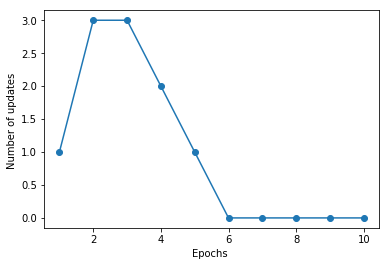

In [61]:
plt.plot(range(1,len(errors_)+1),errors_,marker='o')
plt.xlabel('Epochs ')
plt.ylabel('Number of updates ')
plt.show()

In [10]:
def plot_decision_regions(X,y,w_,resolution=0.02):
    #Setup mqrker generator and color map
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    #Plot the decision surfaces
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=predict(np.array([xx1.ravel(),xx2.ravel()]).T,w_)
    Z=Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],y=X[y == cl, 1],alpha=0.8,c=colors[idx],marker=markers[idx],label=cl,edgecolor='black')

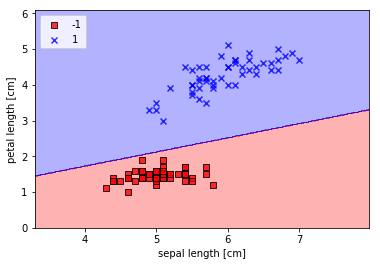

In [11]:
plot_decision_regions(X,y,w_)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()